<a href="https://colab.research.google.com/github/UKashNK/Chicago-Crime-Forecast/blob/main/password_analyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PASSWORD ANALYSIS

Author: Ndugwa Uka.

##Loading Data

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [64]:
url="/content/drive/MyDrive/password_file_e.csv"
#,nrows=3_000_000
imp_df=pd.read_csv(url,sep="\t",encoding_errors="ignore",on_bad_lines="skip")
imp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14341702 entries, 0 to 14341701
Data columns (total 1 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   entries  object
dtypes: object(1)
memory usage: 109.4+ MB


##Password Analysis

### Entry statistics

In [65]:
#Data manipulation
df=imp_df
df.head()

,entries
0,philips
1,johana
2,ilove
3,hitman
4,trandafir


In [66]:
#Finding length of entries and sorting the data
df["length"]=df["entries"].str.len()

In [67]:
#Length Statistics
df["length"].describe()

count    1.434170e+07
mean     8.748832e+00
std      2.921690e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      1.422000e+03
Name: length, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   entries  object 
 1   length   float64
dtypes: float64(1), object(1)
memory usage: 91.6+ MB


### character filter

In [68]:
#filtering for minmum 8 characters
if df["length"].max()>=8:
  df=df[df["length"]>=8]



In [69]:
#Filtering for max 17 characters
if df["length"].min()<=17:
  df=df[df["length"]<=17]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9520860 entries, 4 to 14341701
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   entries  object 
 1   length   float64
dtypes: float64(1), object(1)
memory usage: 217.9+ MB


### positional counts

##### Functions

###### Size df generator

In [19]:
def size_df_generator(url):
  size_dict={}
  url = url
  sizes = [1_000_000,2_000_000,3_000_000,4_000_000,5_000_000,6_000_000,7_000_000,8_000_000,9_000_000]
  df=pd.read_csv(url,sep="\t",encoding_errors="ignore",on_bad_lines="skip")

  #Finding length of entries and sorting the data
  df["length"]=df["entries"].str.len()

  #filtering for minmum 8 characters
  if df["length"].max()>=8:
    df=df[df["length"]>=8]
  #Filtering for max 17 characters
  if df["length"].min()<=17:
    df=df[df["length"]<=17]


  #choosing number of rows
  for size in sizes:
    df=df.sample(n = size,replace = True)
    cutoff = 0.001 * size
    cutoff_0 = 0.001 * size

    #Positional counter
    #Retrieving positional series
    pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,pos_10,pos_11,pos_12,pos_13,pos_14,pos_15,pos_16=positional_counter(df["entries"])

    #keeping the only values with more than 10 entries
    pos_00=pos_0[pos_0>=cutoff]
    pos_01=pos_1[pos_1>=cutoff]
    pos_02=pos_2[pos_2>=cutoff]
    pos_03=pos_3[pos_3>=cutoff]
    pos_04=pos_4[pos_4>=cutoff]
    pos_05=pos_5[pos_5>=cutoff]
    pos_06=pos_6[pos_6>=cutoff]
    pos_07=pos_7[pos_7>=cutoff]

    pos_08=pos_8[pos_8>=(18*cutoff)/20]
    pos_09=pos_9[pos_9>=(18*cutoff)/20]
    pos_010=pos_10[pos_10>=(16*cutoff)/20]
    pos_011=pos_11[pos_11>=(15*cutoff)/20]
    pos_012=pos_12[pos_12>=(14*cutoff)/20]
    pos_013=pos_13[pos_13>=(13*cutoff)/20]
    pos_014=pos_14[pos_14>=(12*cutoff)/20]
    pos_015=pos_15[pos_15>=(11*cutoff)/20]
    pos_016=pos_16[pos_16>=(10*cutoff)/20]


    #Creating dictionaries for size
    tempo_dict = {"0":len(pos_00),"1":len(pos_01),"2":len(pos_02),"3":len(pos_03),"4":len(pos_04),"5":len(pos_05),"6":len(pos_06),"7":len(pos_07),
                  "8":len(pos_08),"9":len(pos_09),"10":len(pos_010),"11":len(pos_011),"12":len(pos_012),"13":len(pos_013),"14":len(pos_014),
                  "15":len(pos_015),"16":len(pos_016)}

    #adding dictionary to main dictionary
    size_dict[f"{size}"] = tempo_dict

  #Creaing dictionary for last size
  last_size_dict = {"0":pos_0,"1":pos_1,"2":pos_2,"3":pos_3,"4":pos_4,"5":pos_5,"6":pos_6,"7":pos_7,
                    "8":pos_8,"9":pos_9,"10":pos_10,"11":pos_11,"12":pos_12,"13":pos_13,"14":pos_14,
                    "15":pos_15,"16":pos_16}

  #Converting it into a Dataframe
  df_size = pd.DataFrame(size_dict)
  df_char_dist = pd.DataFrame(last_size_dict)

  return df_size,df_char_dist


###### Positional counter function

In [4]:
#Positional counter


def positional_counter(comb_size):
  pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6={},{},{},{},{},{},{}
  pos_7,pos_8,pos_9,pos_10,pos_11,pos_12,pos_13={},{},{},{},{},{},{}
  pos_14,pos_15,pos_16={},{},{}


  for entry in comb_size:
    #Adding number of times a charcater appears appears in every position
    if entry[0] in pos_0:
      pos_0[entry[0]]+=1
    else:
      pos_0[entry[0]]=1

    if entry[1] in pos_1:
      pos_1[entry[1]]+=1
    else:
      pos_1[entry[1]]=1

    if entry[2] in pos_2:
      pos_2[entry[2]]+=1
    else:
      pos_2[entry[2]]=1

    if entry[3] in pos_3:
      pos_3[entry[3]]+=1
    else:
      pos_3[entry[3]]=1

    if entry[4] in pos_4:
      pos_4[entry[4]]+=1
    else:
      pos_4[entry[4]]=1

    if entry[5] in pos_5:
      pos_5[entry[5]]+=1
    else:
      pos_5[entry[5]]=1

    if entry[6] in pos_6:
      pos_6[entry[6]]+=1
    else:
      pos_6[entry[6]]=1

    if entry[7] in pos_7:
      pos_7[entry[7]]+=1
    else:
      pos_7[entry[7]]=1

    length=len(entry)

    if length==9:
      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==10:
      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1


    elif length==11:
      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1


    elif length==12:
      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==13:
      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==14:
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==15:
      if entry[14] in pos_14:
        pos_14[entry[14]]+=1
      else:
        pos_14[entry[14]]=1
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==16:
      if entry[15] in pos_15:
        pos_15[entry[15]]+=1
      else:
        pos_15[entry[15]]=1
      if entry[14] in pos_14:
        pos_14[entry[14]]+=1
      else:
        pos_14[entry[14]]=1
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==17:
      if entry[16] in pos_16:
        pos_16[entry[16]]+=1
      else:
        pos_16[entry[16]]=1
      if entry[15] in pos_15:
        pos_15[entry[15]]+=1
      else:
        pos_15[entry[15]]=1
      if entry[14] in pos_14:
        pos_14[entry[14]]+=1
      else:
        pos_14[entry[14]]=1
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1




  #coverting all positonal dictionaries into series
  pos_0=pd.Series(pos_0,name="0")
  pos_1=pd.Series(pos_1,name="1")
  pos_2=pd.Series(pos_2,name="2")
  pos_3=pd.Series(pos_3,name="3")
  pos_4=pd.Series(pos_4,name="4")
  pos_5=pd.Series(pos_5,name="5")
  pos_6=pd.Series(pos_6,name="6")
  pos_7=pd.Series(pos_7,name="7")
  pos_8=pd.Series(pos_8,name="8")
  pos_9=pd.Series(pos_9,name="9")
  pos_10=pd.Series(pos_10,name="10")
  pos_11=pd.Series(pos_11,name="11")
  pos_12=pd.Series(pos_12,name="12")
  pos_13=pd.Series(pos_13,name="13")
  pos_14=pd.Series(pos_14,name="14")
  pos_15=pd.Series(pos_15,name="15")
  pos_16=pd.Series(pos_16,name="16")

  return pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,pos_10,pos_11,pos_12,pos_13,pos_14,pos_15,pos_16



##### Working

In [80]:
df_size,df_char_dist = size_df_generator(url="/content/drive/MyDrive/password_file_e.csv")


In [21]:
df_size.describe()

,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,39.647059,39.529412,39.529412,39.588235,39.647059,39.764706,39.705882,39.588235,39.529412
std,17.153502,17.143212,17.143212,17.157574,17.193535,17.202941,17.138278,17.029602,16.993078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
50%,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
75%,55.000000,54.000000,54.000000,53.000000,54.000000,54.000000,54.000000,53.000000,53.000000
max,57.000000,57.000000,57.000000,57.000000,57.000000,58.000000,57.000000,57.000000,57.000000


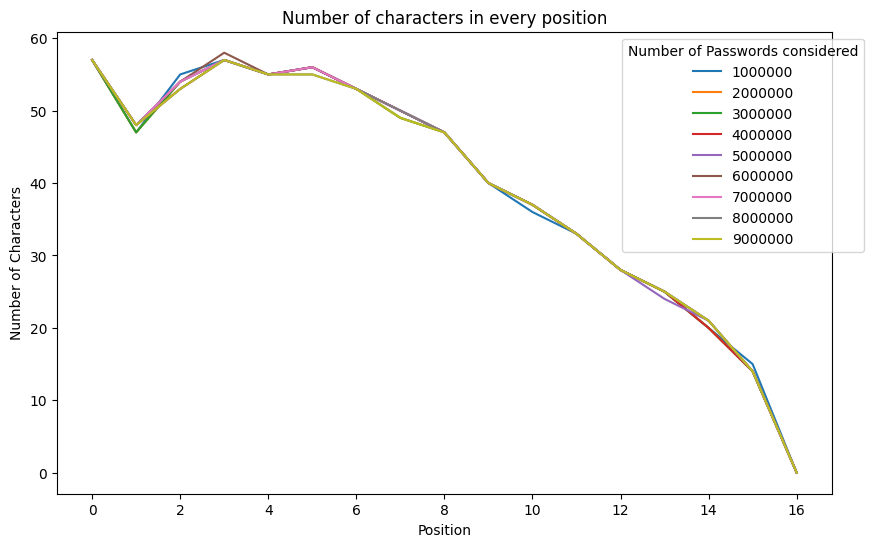

In [22]:
#Ploting df_size
fig,ax = plt.subplots(figsize=(10,6));
ax.set(title="Number of characters in every position",xlabel="Position",ylabel="Number of Characters")
df_size.plot(ax=ax);
ax.legend(bbox_to_anchor=(1.05, 1),title="Number of Passwords considered")
plt.show()

In [23]:
df_size

,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000
0,57,57,57,57,57,57,57,57,57
1,47,47,47,48,48,48,48,48,48
2,55,54,54,53,54,54,54,53,53
3,57,57,57,57,57,58,57,57,57
4,55,55,55,55,55,55,55,55,55
5,56,56,56,56,56,56,56,55,55
6,53,53,53,53,53,53,53,53,53
7,50,49,49,50,50,50,50,50,49
8,47,47,47,47,47,47,47,47,47
9,40,40,40,40,40,40,40,40,40


In [24]:
df_char_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 
 to ♥
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       165 non-null    float64
 1   1       157 non-null    float64
 2   2       165 non-null    float64
 3   3       164 non-null    float64
 4   4       159 non-null    float64
 5   5       160 non-null    float64
 6   6       162 non-null    float64
 7   7       158 non-null    float64
 8   8       147 non-null    float64
 9   9       145 non-null    float64
 10  10      126 non-null    float64
 11  11      119 non-null    float64
 12  12      109 non-null    float64
 13  13      110 non-null    float64
 14  14      97 non-null     float64
 15  15      92 non-null     float64
 16  16      75 non-null     float64
dtypes: float64(17)
memory usage: 37.3+ KB


In [81]:
df_char_dist.iloc[62

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
^,184.0,382.0,506.0,256.0,166.0,412.0,479.0,700.0,436.0,166.0,188.0,196.0,142.0,85.0,70.0,59.0,40.0
_,2290.0,3496.0,6592.0,12845.0,20688.0,25201.0,23097.0,16919.0,11172.0,8287.0,4607.0,3061.0,1813.0,1558.0,730.0,371.0,30.0
`,471.0,126.0,85.0,114.0,139.0,223.0,243.0,662.0,374.0,273.0,146.0,127.0,95.0,13.0,30.0,13.0,NaN
a,433652.0,1394379.0,582136.0,626466.0,665760.0,667152.0,604734.0,501540.0,326551.0,209316.0,127204.0,86889.0,55273.0,33258.0,20522.0,9412.0,2741.0
b,414711.0,67574.0,201313.0,157917.0,156678.0,142693.0,117312.0,88231.0,53744.0,29402.0,19611.0,9862.0,6826.0,3846.0,1680.0,459.0,47.0
c,431451.0,91480.0,275645.0,226354.0,180880.0,167481.0,156877.0,124379.0,81500.0,50842.0,30035.0,19558.0,11341.0,7049.0,4603.0,1296.0,112.0
d,314974.0,73666.0,218812.0,239510.0,173089.0,172811.0,166383.0,146489.0,97716.0,63058.0,38458.0,25465.0,16211.0,10256.0,5342.0,1781.0,711.0
e,170971.0,776383.0,426636.0,658742.0,742527.0,619137.0,491058.0,483030.0,348036.0,232838.0,151296.0,95430.0,60928.0,35922.0,22013.0,9952.0,2239.0
f,183975.0,28477.0,72432.0,79974.0,70276.0,63935.0,59400.0,49188.0,31953.0,20697.0,12582.0,7576.0,4538.0,3173.0,1398.0,601.0,139.0
g,199312.0,36793.0,178949.0,175956.0,121409.0,120083.0,118422.0,104921.0,66803.0,42853.0,25360.0,15409.0,9117.0,5996.0,3051.0,1113.0,331.0


In [82]:
#Splitting dataframe basing on type of characters
df_Num_dist = df_char_dist.iloc[16:26,]
df_Upp_dist = df_char_dist.iloc[33:59,]
df_Low_dist = df_char_dist.iloc[65:91,]

spec1 = df_char_dist.iloc[:16,]
spec2 = df_char_dist.iloc[26:33,]
spec3 = df_char_dist.iloc[59:65,]
spec4 = df_char_dist.iloc[91:,]

#Defing dictionary for special characters i.e everything left
df_Spec_dist = pd.concat([spec1,spec2,spec3,spec4],axis=0)
df_Spec_dist.head(20)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
\n,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,113.0,3367.0,4433.0,7290.0,13837.0,14965.0,11241.0,7081.0,4264.0,2919.0,1409.0,1367.0,551.0,306.0,63.0,NaN,NaN
!,5868.0,2183.0,1255.0,1343.0,1631.0,2437.0,5550.0,22703.0,20350.0,17440.0,6140.0,3884.0,3008.0,2250.0,2012.0,1038.0,209.0
"""",NaN,139.0,16.0,40.0,44.0,118.0,89.0,50.0,85.0,146.0,86.0,23.0,15.0,33.0,26.0,NaN,7.0
#,4794.0,1098.0,1237.0,1047.0,1467.0,2106.0,5702.0,6138.0,4400.0,2086.0,1319.0,658.0,981.0,335.0,343.0,211.0,53.0
$,4032.0,1029.0,1140.0,1438.0,1385.0,1360.0,1951.0,3429.0,2828.0,2280.0,917.0,456.0,444.0,315.0,122.0,245.0,3.0
%,495.0,271.0,273.0,1584.0,370.0,290.0,300.0,971.0,709.0,654.0,470.0,490.0,400.0,171.0,78.0,201.0,28.0
&,374.0,1378.0,1194.0,2233.0,4587.0,3583.0,2243.0,1517.0,744.0,578.0,252.0,142.0,120.0,215.0,49.0,10.0,NaN
',205.0,259.0,721.0,1231.0,1208.0,1010.0,1028.0,1518.0,1163.0,869.0,707.0,418.0,492.0,344.0,197.0,100.0,24.0
(,5620.0,1031.0,334.0,482.0,731.0,738.0,1169.0,1013.0,1020.0,625.0,405.0,218.0,67.0,88.0,37.0,70.0,NaN


In [102]:
df_Spec_dist.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,110.000000,98.000000,97.000000,96.000000,96.000000,97.000000,97.000000,101.000000,95.000000,82.000000,69.000000,55.000000,40.000000,40.000000,36.000000,34.000000,24.000000
mean,637.681818,580.285714,616.030928,766.375000,989.552083,1177.793814,1132.680412,1406.970297,1175.768421,1047.439024,700.724638,641.818182,611.975000,460.650000,310.277778,213.000000,55.916667
std,1910.997318,1649.374108,1770.548652,2354.636163,3157.085164,3821.733790,3381.937483,4235.084014,3460.901624,2947.944750,1698.323238,1358.779355,1053.249051,890.907015,562.597680,343.508105,57.925677
min,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000
25%,11.000000,15.500000,12.000000,15.000000,19.000000,13.000000,14.000000,14.000000,14.000000,16.000000,9.000000,17.500000,37.750000,32.000000,29.750000,20.500000,23.500000
50%,36.000000,42.000000,45.000000,44.500000,45.000000,49.000000,43.000000,40.000000,41.000000,47.500000,39.000000,93.000000,177.000000,168.000000,76.500000,67.500000,35.500000
75%,183.500000,268.000000,273.000000,221.250000,278.750000,290.000000,311.000000,504.000000,472.500000,564.750000,470.000000,473.000000,590.750000,347.250000,333.250000,239.750000,60.250000
max,15534.000000,11600.000000,12322.000000,13934.000000,20688.000000,25201.000000,23097.000000,27313.000000,20688.000000,17440.000000,10289.000000,7587.000000,5149.000000,4841.000000,2514.000000,1561.000000,213.000000


In [92]:

#Sums for every column
sum_0 = df_Num_dist.sum(axis=0)
sum_1 = df_Upp_dist.sum(axis=0)
sum_2 = df_Low_dist.sum(axis=0)
sum_3 = df_Spec_dist.sum(axis=0)

#Adding sums to a dataframe
Sums = pd.concat([sum_0,sum_1,sum_2,sum_3],axis=1)
Sums.columns = ["Num","Upp","Low","Spec"]
Sums.head(20)



,Num,Upp,Low,Spec
0,1930927.0,707675.0,6291253.0,70145.0
1,1969382.0,390306.0,6583444.0,56868.0
2,1949167.0,391451.0,6599627.0,59755.0
3,2083108.0,373951.0,6469369.0,73572.0
4,2390393.0,371639.0,6142971.0,94997.0
5,2791122.0,343500.0,5751132.0,114246.0
6,3568131.0,298408.0,5023591.0,109870.0
7,4232810.0,247265.0,4377821.0,142104.0
8,3005022.0,156982.0,2919268.0,111698.0
9,2044586.0,96844.0,1895896.0,85890.0


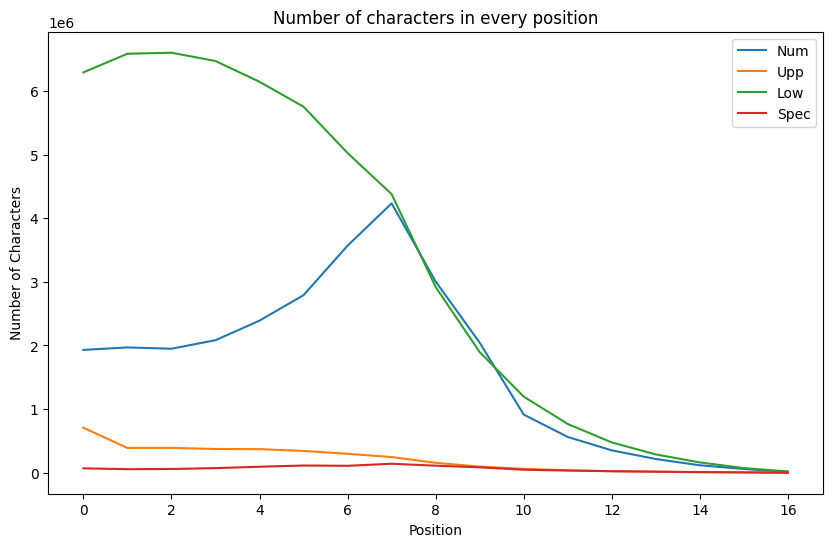

In [100]:
#Plotting Sums around mean
fig,ax = plt.subplots(figsize=(10,6));
ax.set(title="Number of characters in every position",xlabel="Position",ylabel="Number of Characters")
Sums.plot(ax=ax);


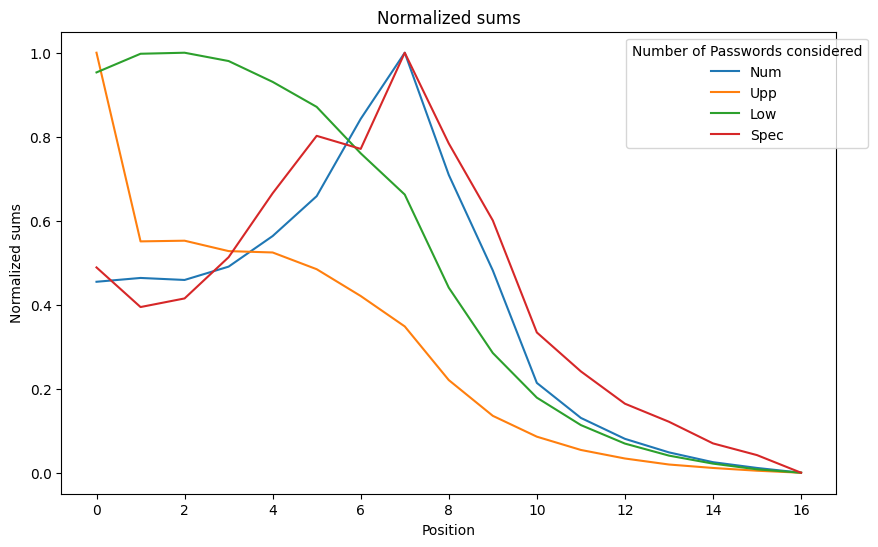

In [99]:
#Min-Max scaling
normalized_df=(Sums-Sums.min())/(Sums.max()-Sums.min())
#plotting normalised df
fig,ax = plt.subplots(figsize=(10,6));
ax.set(title="Normalized sums",xlabel="Position",ylabel="Normalized sums")
normalized_df.plot(ax=ax);
ax.legend(bbox_to_anchor=(1.05, 1),title="Number of Passwords considered")
plt.show()

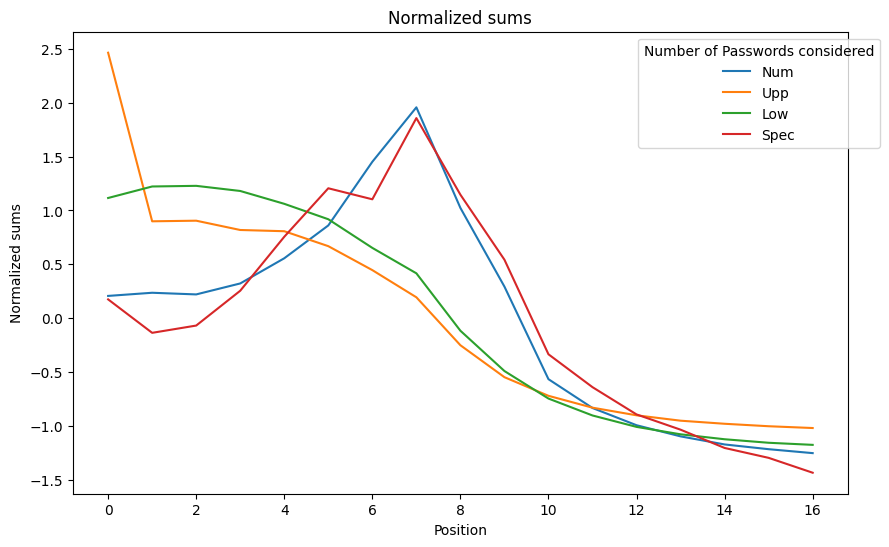

In [101]:
#Normalisation
normalized_df=(Sums-Sums.mean())/Sums.std()
#plotting normalised df
fig,ax = plt.subplots(figsize=(10,6));
ax.set(title="Normalized sums",xlabel="Position",ylabel="Normalized sums")
normalized_df.plot(ax=ax);
ax.legend(bbox_to_anchor=(1.05, 1),title="Number of Passwords considered")
plt.show()

##### analysing password

In [ ]:

def combiner(columns,required_length=2):
  com_ent={}
  for password in columns:
    password=str(password)
    comb_ent={}

     #conting every n syllable combination
     #Finding combinations that contain required letters
    combinations=[]
    required_length=required_length
    starting_index=0
    if required_length>1:
      while starting_index<=len(password)-required_length:
        ending_index= starting_index + required_length
        combinations.append(password[starting_index:ending_index])
        starting_index+=1
      #counting combinations
      for combination in combinations:
        value=combinations.count(combination)
        combination=str(combination)
        comb_ent[combination]=value
    else:
     #counting every character in the entry
      for letter in password:
        value=password.count(letter)
        letter=str(letter)
        comb_ent[letter]=value

      #saving the counts in a dictionary
    com_ent[password]=comb_ent

   #saving the dictioaries for all entries as series
  Combi=pd.Series(com_ent,name="Characters" )

  return Combi


In [ ]:
Combi_1=combiner(df["entries"],1)


In [ ]:
Combi_2=combiner(df["entries"],2)


In [ ]:
Combi_3=combiner(df["entries"],3)


In [ ]:
Combi_4=combiner(df["entries"],4)

In [ ]:

#Adding character and combination breakdown column
df_anl=df.set_index("entries")
df_anl["Combinations(1)"]=Combi_1
'''df_anl["Combinations(2)"]=Combi_2
df_anl["Combinations(3)"]=Combi_3
df_anl["Combinations(4)"]=Combi_4
'''
df_anl


,length,Combinations(1)
entries,,
trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ..."
shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}"
myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}"
monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ..."
robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}"
...,...,...
123d,9.0,"{' ': 5, '1': 1, '2': 1, '3': 1, 'd': 1}"
1234567,14.0,"{' ': 7, '1': 1, '2': 1, '3': 1, '4': 1, '5': ..."
1,8.0,"{' ': 7, '1': 1}"


In [ ]:
#Saving data as csv
df_anl.to_csv("/content/drive/MyDrive/password_analysis/Password_investigation_data.csv")

##Character analysis

###Importing analysed data

In [ ]:
#Displaying loaded data
df_anl=pd.read_csv("/content/drive/MyDrive/password_analysis/Password_investigation_data.csv",index_col=0)
df_anl.describe()

,length
count,9.606090e+06
mean,9.874763e+00
std,2.951810e+00
min,8.000000e+00
25%,8.000000e+00
50%,9.000000e+00
75%,1.100000e+01
max,1.422000e+03


In [ ]:
df_anl.head()

,length,Combinations(1)
entries,,
trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ..."
shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}"
myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}"
monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ..."
robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}"


###How many analysis

#### Creating function to analyse characters

In [ ]:
#Counting how many times a character appears in total
def character_counter(comb_size):
  char_dict={}
  for entry in comb_size:
    entry=eval(entry)
    for key in entry:
      if key in char_dict:
        char_dict[key]+= entry[key]
      else:
        char_dict[key]=entry[key]

  char_total=sum(char_dict.values())
  print("Total characters used:",char_total)
  return char_dict,char_total
#Counting how many passwords a character appears in
def character_presence(comb_size):
  char_pass_dict={}
  for entry in comb_size:
    try:
      for key in entry:
          if key in char_pass_dict:
            char_pass_dict[key]+=1
          else:
            char_pass_dict[key]=1
    except Exception as e:
      pass
  char_pass_total=sum(char_pass_dict.values())
  print("Total unique characters used:",char_pass_total)
  return char_pass_dict,char_pass_total


def character_analysis(comb_size):
  #counting total number of characters used
  characters,total_characters=character_counter(comb_size)
  pass_characters,total_unique_characters=character_presence(comb_size)

  #Turing dictionaries into series
  Characters=pd.Series(characters,name="Combi")
  Pass_charcters=pd.Series(pass_characters,name="Unique_Combi")

  #turning series into dataframe
  df_char=pd.concat([Characters,Pass_charcters],axis=1)
  return df_char


#### character combinations

In [ ]:
df_1=character_analysis(df_anl["Combinations(1)"])
#Saving data as csv for Tableau analysis
df_1.to_csv("/content/drive/MyDrive/password_analysis/1_character_analysis.csv")

Total characters used: 94857858
Total unique characters used: 595124505


In [ ]:
df_2=character_analysis(df_anl["Combinations(2)"])
#Saving data as csv for Tableau analysis
df_2.to_csv("/content/drive/MyDrive/password_analysis/2_character_analysis.csv")

Total characters used: 13912827
Total unique characters used: 13497260


In [ ]:
df_3=character_analysis(df_anl["Combinations(3)"])
#Saving data as csv for Tableau analysis
df_3.to_csv("/content/drive/MyDrive/password_analysis/3_character_analysis.csv")

Total characters used: 12260450
Total unique characters used: 12120519


In [ ]:
df_4=character_analysis(df_anl["Combinations(4)"])
#Saving data as csv for Tableau analysis
df_4.to_csv("/content/drive/MyDrive/password_analysis/4_character_analysis.csv")

Total characters used: 10608073
Total unique characters used: 10541835


## Explorations

In [ ]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#loading data
df_1=pd.read_csv("/content/drive/MyDrive/password_analysis/1_character_analysis.csv",index_col=0)
#df_2=pd.read_csv("/content/drive/MyDrive/password_analysis/2_character_analysis.csv",index_col=0)
#df_3=pd.read_csv("/content/drive/MyDrive/password_analysis/3_character_analysis.csv",index_col=0)
#df_4=pd.read_csv("/content/drive/MyDrive/password_analysis/4_character_analysis.csv",index_col=0)

### 1 character

#### analysis

In [ ]:
#sorting by maximum Unique combi
df_1=df_1.sort_values(by="Unique_Combi",ascending=False)
df_1.head()

,Combi,Unique_Combi
',13163.0,148765186.0
,92244.0,139233515.0
:,7115.0,74394211.0
",",NaN,64782421.0
1,4896314.0,61421190.0


In [ ]:
#dropping entries with less than 1,000 unique appearances
df1_1000=df_1[df_1["Unique_Combi"]>=1_000]
df1_1000.describe()

,Combi,Unique_Combi
count,9.700000e+01,9.800000e+01
mean,9.776025e+05,6.072462e+06
std,1.505110e+06,2.316143e+07
min,8.350000e+02,1.004000e+03
25%,2.299300e+04,2.866750e+04
50%,1.391080e+05,1.741580e+05
75%,1.792979e+06,1.754803e+06
max,6.863777e+06,1.487652e+08


<ipython-input-15-056d1947ab88>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot.index)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3615 (\N{THAI CHARACTER FO FAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


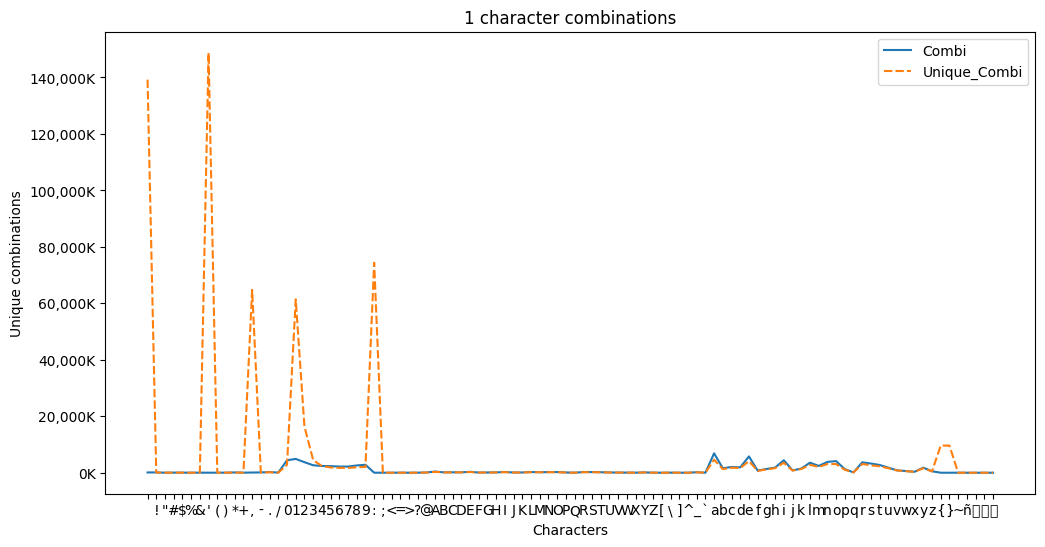

In [ ]:
def thou(x, pos):
    'The two args are the value and tick position'
    new_x = x/1000
    return f"{new_x:,.0f}K"

fmt_thou=ticker.FuncFormatter(thou)

df_plot=df1_1000.sort_index()
fig,ax=plt.subplots()
ax=sns.lineplot(data=df_plot)
ax.set_xticklabels(df_plot.index)
ax.set_xlabel("Characters")
ax.set_ylabel("Unique combinations")
ax.yaxis.set_major_formatter(fmt_thou)
ax.figure.set_size_inches(12,6)
ax.set_title("1 character combinations")
plt.show()

In [ ]:
#adding column for cummulative unique combi
df_1["Cummulative_Combi"]=df_1["Combi"].cumsum()
df_1.head()

,Combi,Unique_Combi,Cummulative_Combi
',13163.0,148765186.0,13163.0
,92244.0,139233515.0,105407.0
:,7115.0,74394211.0,112522.0
",",NaN,64782421.0,NaN
1,4896314.0,61421190.0,5008836.0


In [ ]:
#Finding 80% of Combinations used
total= df_1["Cummulative_Combi"].iloc[-1]
cutoff=total*0.99
print(cutoff)
#cutting off df1 at cutoff point
df1_99=df_1[df_1["Cummulative_Combi"]<=94000000]
df1_99.describe()

93909279.42


,Combi,Unique_Combi,Cummulative_Combi
count,6.300000e+01,6.300000e+01,6.300000e+01
mean,1.490649e+06,8.405418e+06,6.737877e+07
std,1.656556e+06,2.753349e+07,3.097643e+07
min,8.350000e+02,8.331400e+04,1.316300e+04
25%,1.588975e+05,1.844690e+05,4.965486e+07
50%,7.475280e+05,1.293831e+06,8.328334e+07
75%,2.396906e+06,2.711870e+06,9.176241e+07
max,6.863777e+06,1.487652e+08,9.391090e+07


In [ ]:
df1_99.tail()

,Combi,Unique_Combi,Cummulative_Combi
!,14370,11948,15350113
D,12930,11608,15363043
B,12911,10942,15375954
-,13063,10218,15389017
H,10823,10110,15399840


#### assigning criticality to passwords

In [ ]:
total= df_1["Cummulative_Combi"].iloc[-1]
cutoff=total*0.99
print(cutoff)

93909279.42


In [ ]:

for value in df_1["Cummulative_Combi"]:
  index=df_1.index[df_1["Cummulative_Combi"]==value]
  #grouping characters into critical and non-critical
  if value <= 94000000:
    df_1.loc[index,"Critical"]=False
  else:
    df_1.loc[index,"Critical"]=True


In [ ]:
df_1['Critical'].value_counts()

Critical
True     563
False     63
Name: count, dtype: int64

In [ ]:
df_1.head()

,Combi,Unique_Combi,Cummulative_Combi,Critical
a,1245806,859734,1245806,False
e,1124863,813069,2370669,False
i,848476,685644,3219145,False
n,723450,588781,3942595,False
o,782475,588213,4725070,False


In [ ]:
df1_anl=pd.read_csv("/content/drive/MyDrive/password_analysis/Password_investigation_data.csv",usecols=[0,1,2])
df1_anl.head()

,entries,length,Combinations(1)
0,trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ..."
1,shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}"
2,myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}"
3,monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ..."
4,robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}"


In [ ]:
df1_anl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9606090 entries, 0 to 9606089
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   entries          object 
 1   length           float64
 2   Combinations(1)  object 
dtypes: float64(1), object(2)
memory usage: 219.9+ MB


In [ ]:
#Checking if an entry has a critical character
crit_ent={}
crit_cat={}
df1_crit=df1_anl.select_dtypes(include="object")
df1_crit.set_index("entries",inplace=True)
series_crit=df1_crit["Combinations(1)"]
series_crit.head()

for entry,combi in series_crit.items():
  combi=eval(combi)
  #print(combi)
  criticality=0
  for key,value in combi.items():
    if df_1.loc[key,"Critical"]==True:
       criticality += value

    crit_ent[entry]=criticality
    if criticality>0:
      crit_cat[entry]=True
    else:
      crit_cat[entry]=False




In [ ]:
#converting crit dictionary to series
Criticality=pd.Series(crit_ent,name="Criticality")
Crit_cat=pd.Series(crit_cat,name="Critical")
df1_anl.set_index("entries",inplace=True)
df1_anl["Criticality"]=Criticality
df1_anl["Critical"]=Crit_cat

In [ ]:
df1_anl.head()

,length,Combinations(1),Criticality,Critical
entries,,,,
trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ...",0,False
shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}",0,False
myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}",0,False
monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ...",0,False
robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}",0,False


In [ ]:
df1_anl["Critical"].value_counts()

Critical
False    8979451
True      626639
Name: count, dtype: int64

In [ ]:
df1_anl.to_csv("/content/drive/MyDrive/password_analysis/1_character_analysis.csv")

In [ ]:
df1_anl.describe()

,length,Criticality
count,9.606090e+06,9.606090e+06
mean,9.874763e+00,9.857861e-02
std,2.951810e+00,6.000959e-01
min,8.000000e+00,0.000000e+00
25%,8.000000e+00,0.000000e+00
50%,9.000000e+00,0.000000e+00
75%,1.100000e+01,0.000000e+00
max,1.422000e+03,2.080000e+02


In [ ]:
df1_anl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9606090 entries, trandafir to *7¡Vamos!
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   length           float64
 1   Combinations(1)  object 
 2   Criticality      int64  
 3   Critical         bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 302.3+ MB


In [ ]:
df1_anl.head()

,length,Combinations(1),Criticality,Critical
entries,,,,
trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ...",0,False
shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}",0,False
myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}",0,False
monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ...",0,False
robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}",0,False


In [ ]:
#Filtering for criticality less than 4
df1_crit=df1_anl[df1_anl["Criticality"]<4]
df1_crit.head()

,length,Combinations(1),Criticality,Critical
entries,,,,
kod666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666,255.0,"{'k': 1, 'o': 1, 'd': 1, '6': 252}",0,False
651964196319621961196019591958195719561955195419531952195119501949194819471946194519441943194219411940193919381937193619351934193319321931193019291928192719261925192419231922192119201919191819171916191519141913191219111910190919081907190619051904190319021,255.0,"{'6': 12, '5': 17, '1': 80, '9': 69, '4': 17, ...",0,False
Please authenticate your account by entering your Hotmail password. This password can be used to log in to RockYou. You may change to a different password later by going to the Account/Privacy options of your My Stuff page. Only your current password will,255.0,"{'P': 2, 'l': 7, 'e': 15, 'a': 16, 's': 12, ' ...",3,True
Please authenticate your account by entering your password. This password can be used to log in to RockYou. You may change to a different password later by going to the Account/Privacy options of your My Stuff page. Only your current password will be stor,255.0,"{'P': 2, 'l': 6, 'e': 16, 'a': 15, 's': 13, ' ...",3,True
bfy6476y6666676666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666,255.0,"{'b': 1, 'f': 1, 'y': 2, '6': 248, '4': 1, '7'...",0,False


In [ ]:
df1_crit.describe()

,length,Criticality
count,9.581051e+06,9.581051e+06
mean,9.852865e+00,8.155222e-02
std,2.219269e+00,3.433072e-01
min,8.000000e+00,0.000000e+00
25%,8.000000e+00,0.000000e+00
50%,9.000000e+00,0.000000e+00
75%,1.100000e+01,0.000000e+00
max,2.550000e+02,3.000000e+00


In [ ]:
#viewing entry for criticality 208
df1_crit[df1_crit["Criticality"]==208]

,length,Combinations(1),Criticality,Critical
entries,,,,
eyeshadow2++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++,218.0,"{'e': 2, 'y': 1, 's': 1, 'h': 1, 'a': 1, 'd': ...",208,True


In [ ]:
#sorting basing on length
df1_anl=df1_anl.sort_values(by="length",ascending=False)
df1_anl.head(20)

,length,Combinations(1),Criticality,Critical
entries,,,,
"""""""""skyche\n!¿«´¯k®åzyi3()y¯`»?¡: i\n!£%&(\n!zgirl\n!yourmom!\n!yiyo!\n!yhwh73!\n!yecal!\n!xxdanneexx!\n!xoxjadeangelpreciousxox!\n!xobile\n!xMikol\n!xIXIx@\n!x.ellie.x!\n!william!\n!wicked!\n!weed!\n!volleyball28\n!versace!\n!uxxiqi52!\n!ussak!\n!ushtastic\n!uoykcor\n!ugly!\n!tyson\n!tymmy!\n!twister!\n!tweety-pie!\n!tweety\n!trish\n!trevor!\n!topshop!\n!tink!\n!tina!\n!thug6043692\n!thislove!0609\n!thatbitch\n!texas75\n!t$um022\n!sweety!\n!super!\n!sunshine\n!steven!\n!stars\n!star!\n!srtafk!\n!spongebob!\n!spacemy\n!softball!\n!smile\n!slandgirl671\n!shorty!\n!shorty\n!shit!\n!shinging\n!sherbert!\n!shelby\n!shai!\n!shVeet13\n!sexcliljazz2468!\n!serius!\n!sense23\n!scooby!\n!ryanlover!\n!robert!\n!roach\n!riley1\n!ricky!\n!rebecca!\n!rainbow!\n!rabbit!\n!qwerty\n!qazwsx\n!qazXsw2\n!qaz@wsx\n!qaz2Wsx\n!qaz2WSX\n!qaz1QAZ\n!qAzXsW2\n!q2w3e4r\n!puppy2008\n!please!\n!pitchi!\n!pinkpockadots93!\n!piglet!\n!perfect\n!peace!\n!password2\n!party\n!panic\n!orange\n!nuteL.com\n!november!\n!nothing!\n!nick!\n!nats!\n!nathan!\n!narnia9\n!mylove!\n!mydreads\n!mybaby!\n!monkey!\n!monkey\n!momo!\n!molly!\n!mo22par\n!mike!\n!marmarita1\n!mark!\n!marie!\n!manurule!\n!manny_\n!m@b@ll3r\n!luvyou\n!luvt00d\n!luvp3dro\n!luvmiboo\n!luvjad35\n!luvall3n\n!luv!456\n!lubmybaby\n!loveyou2\n!lovemike\n!lovecandy\n!love_u\n!lovJoe\n!lovAJUJU\n!lizzy25\n!linkinpark!\n!lilone!\n!lilbrownjug!\n!likeomg!\n!levon!\n!levi!\n!lesedi!\n!leigh!\n!lbhim\n!lauren!\n!ladybug!\n!l4a5m1b\n!l0veyou\n!kyle!\n!kingstree\n!killer!\n!kevin1\n!kevin\n!kareem!\n!kaitlyn\n!juventus!\n!junivero",1422.0,"{'""': 4, 's': 55, 'k': 27, 'y': 46, 'c': 23, '...",188,True
<div align=\\\\\\'center\\\\\\' style=\\\\\\'font:bold 11px Verdana; width:310px\\\\\\'><a style=\\\\\\'background-color:#eeeeee;display:block;width:310px;border:solid 2px black; padding:5px\\\\\\' href=\\\\\\'http://www.musik-live.net\\\\\\' target=\\\\\\'_blank\\\\\\'>Playing/Tangga,285.0,"{'<': 2, 'd': 11, 'i': 10, 'v': 2, ' ': 11, 'a...",80,True
<div id=\\'24813\\'><a href=\\'http://www.revistate.com\\'><img src=\\'http://www.revistate.com/uploads/20080218/rq/rqwpcf28o1pyb10yfzen53kmuipsi0_PAPARAZZI.jpg\\' border=0 alt=\\'Hazte famoso en www.revistate.com\\'></a></div><div id=\\'72891\\'><a href=\\'http://w,266.0,"{'<': 7, 'd': 7, 'i': 11, 'v': 6, ' ': 10, '='...",58,True
<style type=\\'text/css\\'>.bg_content{background-image:url(http://img360.imageshack.us/img360/5198/escanear00532wq9.jpg);}.bg_content{background-repeat:repeat;}</STYLE><a href=\\'http://hi5.enchulatupagina.com\\' target=\\'_top\\'><img src=\\'http://hi5.enchula,262.0,"{'<': 4, 's': 7, 't': 20, 'y': 2, 'l': 4, 'e':...",40,True
<div id=\\'61850\\'><a href=\\'http://revistate.wamba.com\\'><img src=\\'http://recursos.fotocajon.com/revistate/20080831/wr/wrqigy07y2sr0fujf3w9bgs3kdkyqfpc_ROLLINGSTONE.jpg\\' border=0 alt=\\'Hazte famoso en www.revistate.com\\'></a></div><div id=\\'6574\\'><a,262.0,"{'<': 7, 'd': 7, 'i': 10, 'v': 6, ' ': 9, '=':...",49,True
<style type=\\'text/css\\'>.bg_content{background-image:url(http://i184.photobucket.com/albums/x79/pixvirtual/us017/1vC6Nr7G6d1o.jpg);}.bg_content{background-repeat:repeat;}</STYLE><a href=\\'http://www.enchulatupagina.com/imagenes/amor/corazon-44275.html\\',258.0,"{'<': 3, 's': 6, 't': 19, 'y': 2, 'l': 6, 'e':...",33,True
<style type=\\'text/css\\'>body{ background: url(http://i184.photobucket.com/albums/x79/pixvirtual/us009/bMKXmty21M6N.jpg) white center no-repeat fixed; } table. .heading_profile. .heading_profile_left. table td. #p_container. #p_nav_primary. #top_header. #,257.0,"{'<': 1, 's': 5, 't': 19, 'y': 5, 'l': 9, 'e':...",23,True
<style type=\\'text/css\\'>body{ background: url(http://recursos.fotocajon.com/enchulatupagina/img003/zxddXgCBLcTi.jpg) white center no-repeat fixed; } table. .heading_profile. .heading_profile_left. table td. #p_container. #p_nav_primary. #top_header. #p_n,257.0,"{'<': 1, 's': 5, 't': 17, 'y': 4, 'l': 

### 2 character

In [ ]:
df_2=df_2.sort_values(by="Unique_Combi",ascending=False)
df_2.head()

,Combi,Unique_Combi
an,207158,196667
er,174681,169506
in,133180,128425
ar,131408,127135
12,110371,106388


In [ ]:
#dropping entries with less than 1,000 unique appearances
df2=df_2[df_2["Unique_Combi"]>=1_000]
df2.describe()

,Combi,Unique_Combi
count,937.000000,937.000000
mean,14184.660619,13756.439701
std,21387.008408,20657.952904
min,1009.000000,1003.000000
25%,1852.000000,1823.000000
50%,4637.000000,4534.000000
75%,17622.000000,17169.000000
max,207158.000000,196667.000000


<ipython-input-61-39a47cc0e04c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot.index)


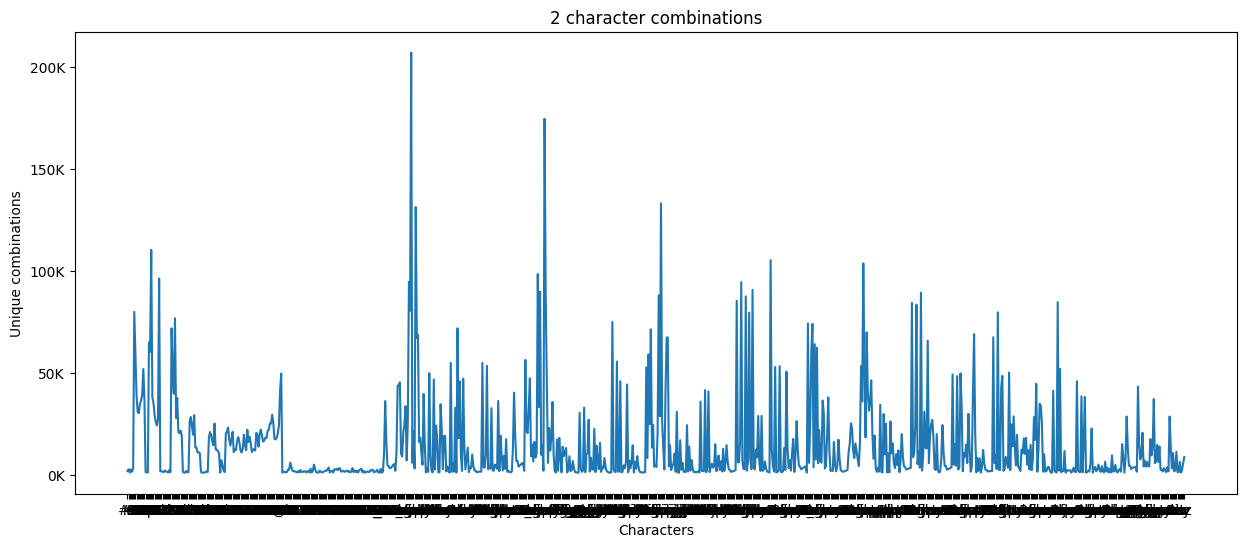

In [ ]:
def thou(x, pos):
    'The two args are the value and tick position'
    new_x = x/1000
    return f"{new_x:,.0f}K"

fmt_thou=ticker.FuncFormatter(thou)

df_plot=df2["Combi"].sort_index()
fig,ax=plt.subplots()
ax=sns.lineplot(data=df_plot)
ax.set_xticklabels(df_plot.index)
ax.set_xlabel("Characters")
ax.set_ylabel("Unique combinations")
ax.yaxis.set_major_formatter(fmt_thou)
ax.figure.set_size_inches(15,6)
ax.set_title("2 character combinations")
plt.show()

In [ ]:
#adding column for cummulative unique combi
df_2["Cummulative_Combi"]=df_2["Combi"].cumsum()
df_2.head()

,Combi,Unique_Combi,Cummulative_Combi
an,207158,196667,207158
er,174681,169506,381839
in,133180,128425,515019
ar,131408,127135,646427
12,110371,106388,756798


In [ ]:
#Finding 80% of Combinations used
total= df_2["Cummulative_Combi"].iloc[-1]
cutoff=total*0.98

#cutting off df1 at cutoff point
df=df_2[df_2["Cummulative_Combi"]<=cutoff]
df.describe()

,Combi,Unique_Combi,Cummulative_Combi
count,1491.000000,1491.000000,1.491000e+03
mean,9144.573441,8870.773977,1.186770e+07
std,18175.328335,17563.897304,2.658329e+06
min,367.000000,367.000000,2.071580e+05
25%,694.000000,684.500000,1.164185e+07
50%,1640.000000,1612.000000,1.304093e+07
75%,9117.000000,9002.000000,1.344571e+07
max,207158.000000,196667.000000,1.363456e+07
